# **Section 3 - Product Design, Development and Evaluation**

# **The Business Challenge**

British Standards Institution (BSI) https://www.bsigroup.com/en-GB/ sells both British Standards (BS) and International Standards (ISO ) as documents via its eshop, https://shop.bsigroup.com/. BSI's Marketing Department extract 
clickstream data sets for the eshop from Google Analytics and uses Tableau to analyse this data set to identify ways for increasing revenue. 
This challenge below is to analyse a relevant google analytics data set to identify ways to increase revenue by doing the following:


Predicting:

•	Visitors that will buy or not buy a Standard.

Analysing visitors’ behaviour such as:

•	How do visitors enter the site (direct, search engines, other sources)?
 Which route results in the most sales?

•	A comparison of sales by new and returning visitors, region, browser and operating systems used by visitors.


This business challenge is relevant to the data and analytics pathway in that it will follow the fundamental processes in data and analytics and data science as outlined in the data science hierarchy and the CRISP-DM model (Chapman et al. 1999) via (Kelleher & Tierney, 2018).

Processes are:

Business Understanding

Data Understanding

Data Preparation

Modeling

Evaluation


# **Import Libraries**

In [312]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as CM
from google.colab import drive
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import lightgbm as lgb
%matplotlib inline

# **Understanding The Data**


# **Read the dataset into a pandas dataframe**


In [313]:
data = pd.read_csv('./sample_data/online_shoppers_intention_edited.csv')

In [314]:
#display first 5 rows to see what the data set looks like
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.0,"Feb, 2016",Macintosh,Safari,European Union,Google,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.00,0.00,0.10,0.0,0.0,"Feb, 2016",Macintosh,Chrome,European Union,Direct,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.0,"Feb, 2016",iOS,Safari,Easter Europe,Partners,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.67,0.05,0.14,0.0,0.0,"Feb, 2016",Android,Chrome,North America,Youtube,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.50,0.02,0.05,0.0,0.0,"Feb, 2016",Android,UC Browser,European Union,Youtube,Returning_Visitor,True,False


# **Get dataset information**

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

The data set has 18 columns and 12330 rows each representing an idividual visitor to the eshop. The rows are of different data types.

Meta data table below exaplains what each column represents
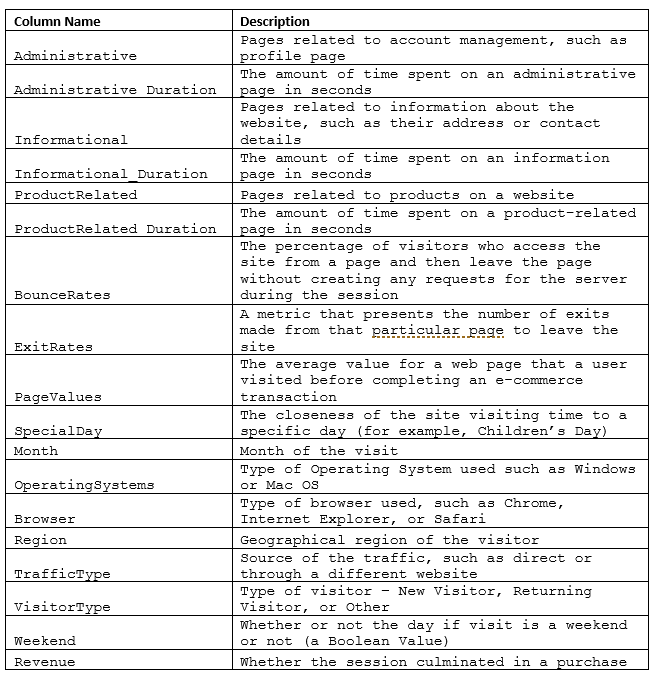

**Check if there are null values in the data set. The result shows there is none**

In [316]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Check if there are duplicated rows in the data set. The result shows that there are 125 duplicates. It is usually best to investigate these, especially if the data set is small. This data set is large so these 125 rows can be deleted.**

In [317]:
print("duplicate rows: ", data.duplicated().sum())

duplicate rows:  125


In [318]:
data.drop_duplicates(inplace=True)

# **Display statistical information for the numerical columns.**

The Produt RelatedDuration column has large values. The mean value is 1206 seconds or 20 minutes and the maximum value is 63973.52 seconds or 17 hours which. The average time is a reasonable a durations for looking at products on an eshop before buying. However, the mean time is high and could possibly be related to visitors not closing pages after looking at produts.

In [319]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.00,12205.00,12205.00,12205.00,12205.00,12205.00,1.22e+04,12205.00,12205.00,12205.00
mean,2.34,81.65,0.51,34.83,32.05,1206.98,2.04e-02,0.04,5.95,0.06
std,3.33,177.49,1.28,141.42,44.59,1919.60,4.53e-02,0.05,18.65,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,8.00,193.00,0.00e+00,0.01,0.00,0.00
50%,1.00,9.00,0.00,0.00,18.00,608.94,2.90e-03,0.03,0.00,0.00
75%,4.00,94.70,0.00,0.00,38.00,1477.15,1.67e-02,0.05,0.00,0.00
max,27.00,3398.75,24.00,2549.38,705.00,63973.52,2.00e-01,0.20,361.76,1.00


# **Exploratory Data Analysis (EDA)**

# **Univariate Analyses**

# **An Analysis of the attribute Revenue**

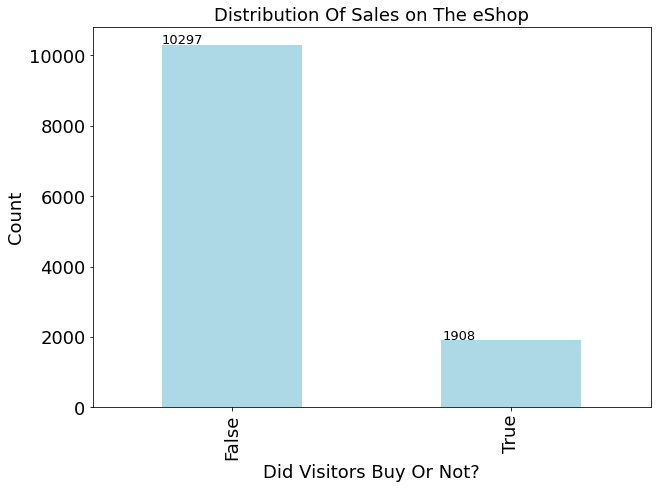

In [320]:
ax = data['Revenue'].value_counts().plot(kind="bar", figsize=(10,7),
                                        color="lightblue", fontsize=18)

ax.set_alpha(0.8)
ax.set_title("Distribution Of Sales on The eShop", fontsize=18)
ax.set_xlabel("Did Visitors Buy Or Not?", fontsize=18);
ax.set_ylabel("Count", fontsize=18);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005), fontsize=13)


**Show Revenue (True/False) as percentage**

In [321]:
print("% Revenue False : ", round(10422/12330 * 100, 2)) 

% Revenue False :  84.53


In [322]:
print("% Revenue True : ", round(1908/12330 * 100, 2)) 

% Revenue True :  15.47


**The distribution of visitors to the eshop who convert shows low total of conversion at only 15.5%. It is important to identify why and also to predict visitors who are not likely to convert because we could implement various stategies to entice them to convert such as offering discounts and showing them products similar to what they viewed but at better prices.**

# **An analysis of the attribute VisitorType**

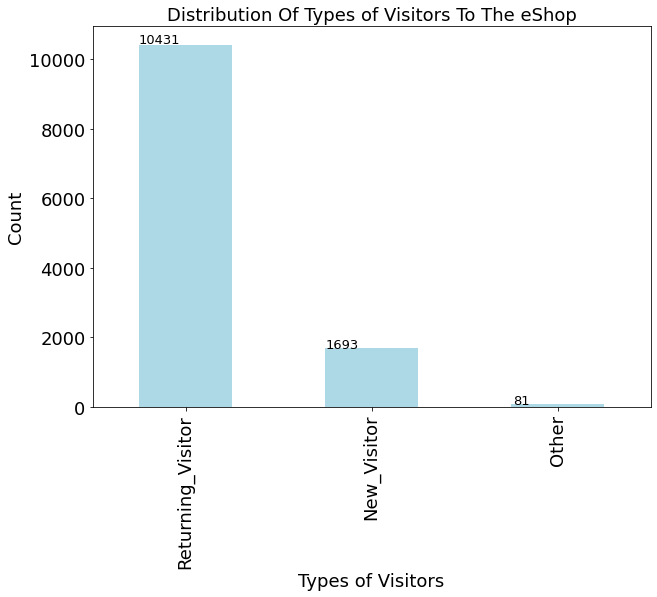

In [323]:
ax = data['VisitorType'].value_counts().plot(kind="bar", figsize=(10,7),
                                        color="lightblue", fontsize=18)

ax.set_alpha(0.8)
ax.set_title("Distribution Of Types of Visitors To The eShop", fontsize=18)
ax.set_xlabel("Types of Visitors", fontsize=18);
ax.set_ylabel("Count", fontsize=18);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005), fontsize=13)

**The percentages of visitors by type**

In [324]:
print("% Returning Visitors : ", round(10551/12330*100, 2)) 

% Returning Visitors :  85.57


In [325]:
print("% New Visitors : ", round(1694/12330*100, 2))

% New Visitors :  13.74


In [326]:
print("% Other Visitors : ", round(85/12330*100, 2))

% Other Visitors :  0.69


**The number of Returning Visitors are high at 85.6% which shows that the website is performing enough to attract repeat visits. There are few issues that could be examined such as are visitors put off by the prices of Standards, are the Standards not meeting visistors' needs?**

# **An Analysis of the attribute Traffic Type**

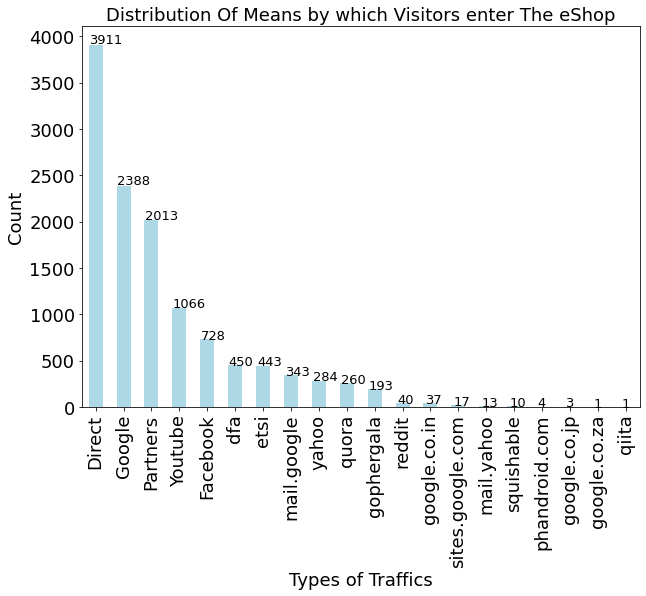

In [327]:
ax = data['TrafficType'].value_counts().plot(kind="bar", figsize=(10,7),
                                        color="lightblue", fontsize=18)

ax.set_alpha(0.8)
ax.set_title("Distribution Of Means by which Visitors enter The eShop", fontsize=18)
ax.set_xlabel("Types of Traffics", fontsize=18);
ax.set_ylabel("Count", fontsize=18);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005), fontsize=13)

**Direct visit to the website is highest. Visiting the eshop via sites such as Google search, Partner sites and Youtube are high. If a comparison of conversion via these means are also high then it would be best to increase advertising on these sites.**

# **An Analysis of attribute Region**

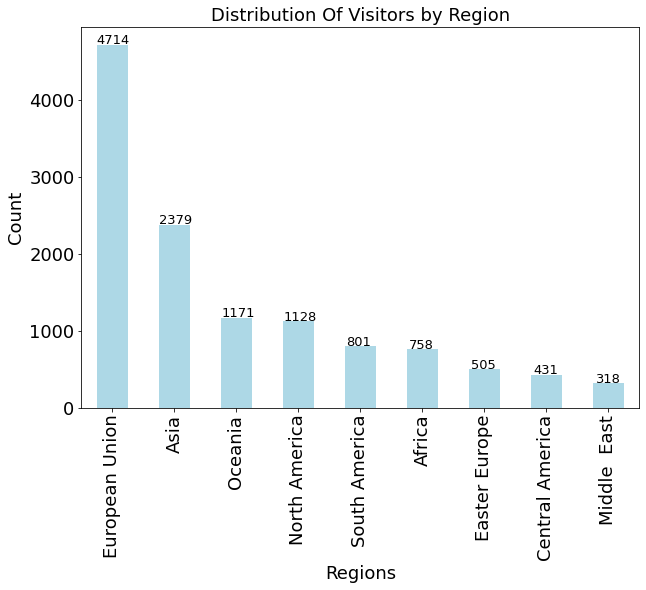

In [328]:
ax = data['Region'].value_counts().plot(kind="bar", figsize=(10,7),
                                        color="lightblue", fontsize=18)

ax.set_alpha(0.8)
ax.set_title("Distribution Of Visitors by Region", fontsize=18)
ax.set_xlabel("Regions", fontsize=18);
ax.set_ylabel("Count", fontsize=18);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005), fontsize=13)

**Sales outside UK and EU are low, this could be related to the agreement between National Standards bodies which the Stakeholder explains, National Standards bodies do not actively sell International ISO standards within other countries because countries will have their own standards, though people globally can go to the eshop to buy ISOs. However, National Standards bodies such as BSI can actively sell its own BS Standards to other regions.**

# **An Analysis of attribute Browser**

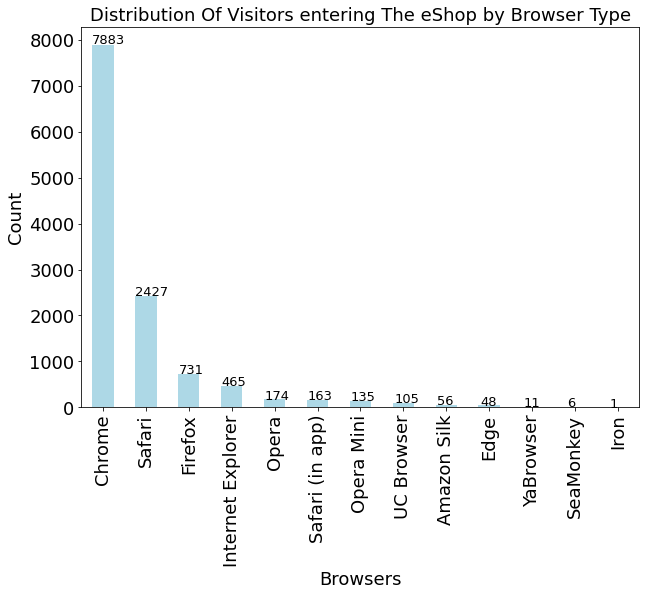

In [329]:
ax = data['Browser'].value_counts().plot(kind="bar", figsize=(10,7),
                                        color="lightblue", fontsize=18)

ax.set_alpha(0.8)
ax.set_title("Distribution Of Visitors entering The eShop by Browser Type", fontsize=18)
ax.set_xlabel("Browsers", fontsize=18);
ax.set_ylabel("Count", fontsize=18);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005), fontsize=13)

**There are some browsers which are popular among the general population and these are the browser which show as the top performing browsers for visitors to the eshop. Therefore, it appears the eshop is compatible with all browsers.**

# **An analysis of attribute Operating System**

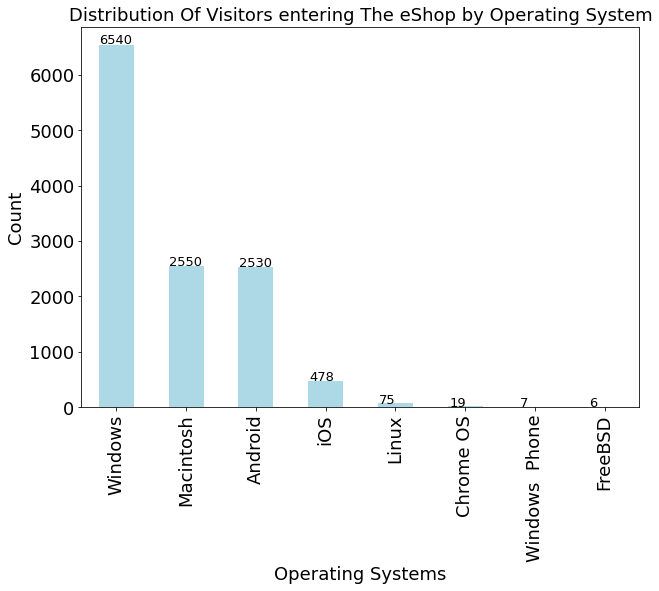

In [330]:
ax = data['OperatingSystems'].value_counts().plot(kind="bar", figsize=(10,7),
                                        color="lightblue", fontsize=18)

ax.set_alpha(0.8)
ax.set_title("Distribution Of Visitors entering The eShop by Operating System", fontsize=18)
ax.set_xlabel("Operating Systems", fontsize=18);
ax.set_ylabel("Count", fontsize=18);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005), fontsize=13)

**There are some Operating Systems which are popular among the general population and these are the Operating Systems which show as the top performing Operating Systems for visitors to the eshop. Therefore, it appears the eshop is compatible with all Operating Systems.**

# **An Analysis of attribute Month**

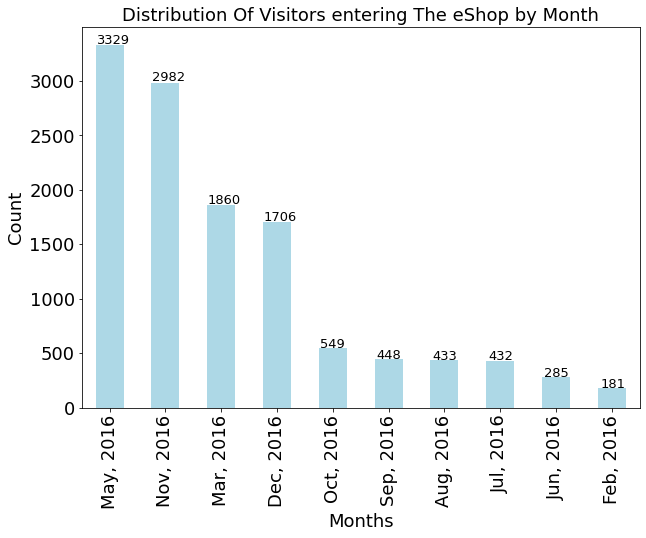

In [331]:
ax = data['Month'].value_counts().plot(kind="bar", figsize=(10,7),
                                        color="lightblue", fontsize=18)

ax.set_alpha(0.8)
ax.set_title("Distribution Of Visitors entering The eShop by Month", fontsize=18)
ax.set_xlabel("Months", fontsize=18);
ax.set_ylabel("Count", fontsize=18);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005), fontsize=13)

**There are some months which have higher numbers of visitors. but there appears to be no specific seasonal pattern.**

# **Bivariate Analyses**

# **An analysis of the attributes Revenue and VisitorType**

[Text(0.5, 1.0, 'Revevue and VisitorType')]

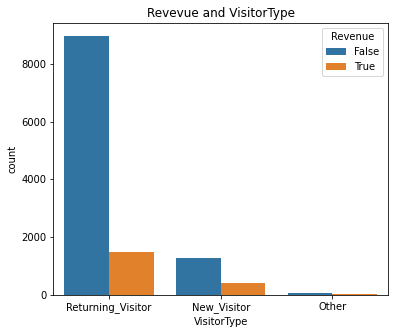

In [332]:
fig_dims = (6, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=data,x='VisitorType',hue='Revenue').set(title='Revevue and VisitorType')

# **An analysis of the attributes Revenue and Month**

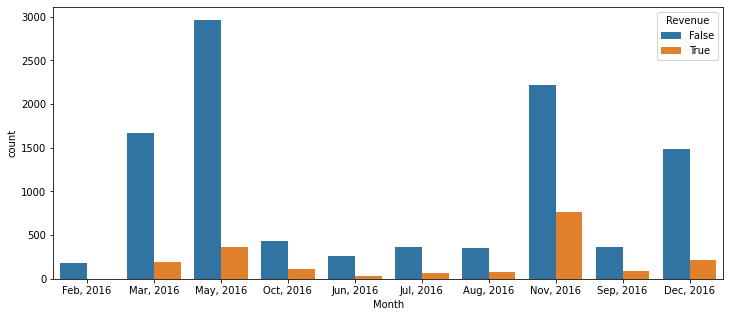

In [333]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=data,x='Month',hue='Revenue', ax=ax)

# **An analysis of the attributes Revenue and Browser**

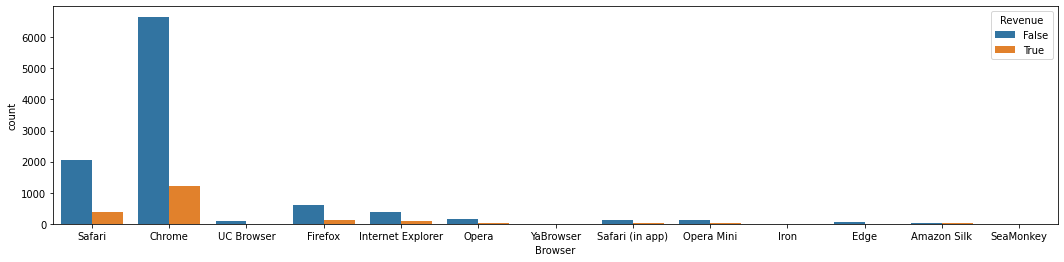

In [334]:
fig_dims = (18, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=data,x='Browser',hue='Revenue', ax=ax)

# **An analysis of Revenue and TrafficType**

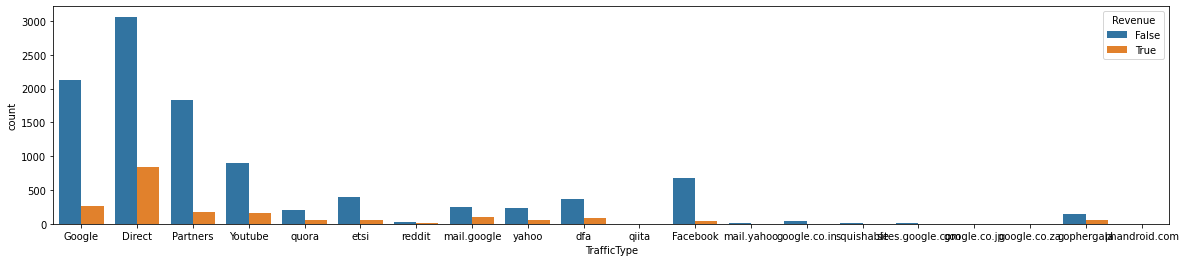

In [335]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=data,x='TrafficType',hue='Revenue', ax=ax)

# **An analysis of Revenue and Region**

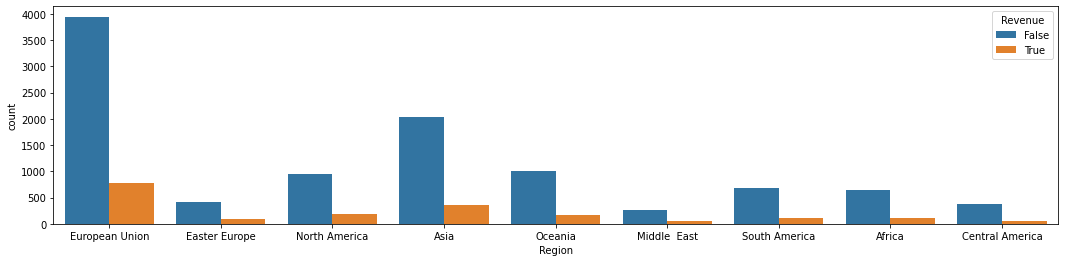

In [336]:
fig_dims = (18, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=data,x='Region',hue='Revenue', ax=ax)

## **DATA PREPARATION/PREPROCESSING**

# **Examining the dataset for correlation/dependency between attributes**


**What is correlation?**

Corelation is a metric that indicates to us how related or dependent two columns are to each other.

For example if we have column A and column B with a high correlation, for ecample +/- 1 or close to this figure, this tell me that A and B are directly related to each other. So if a value in A increases/decreases then value in B also increases/decreases.

If two columns are correlated either + or -, we can drop one of the column from our dataset. This is because both columns will not contribute much to the model.

So from our correlation chart we see that the following are correlated:

ExitRates and BounceRates at 0.91

ProductRelated_Duration and ProductRelated at 0.86

Informational and Informational_duration at 0.62

This is as expected because the longer a visitirs remains on a ProductRelated or Information webpage of the eshop the more the durations will increase. Also if exit rate is high then it is likely that most of these might be bounces. 

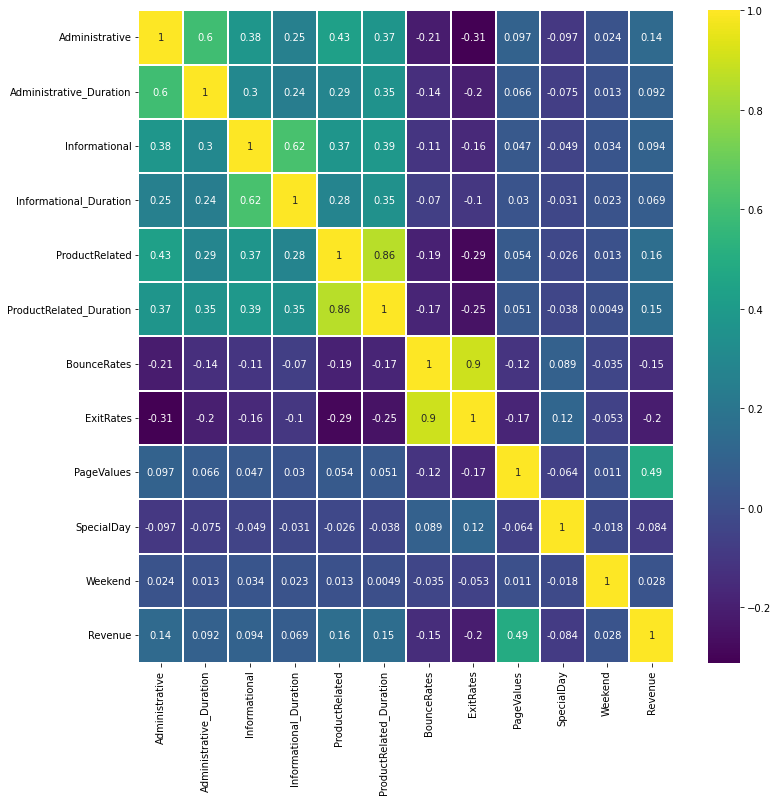

In [337]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True,cmap='viridis',linewidths=1)

# **Dropping one of a set of two correlated columns/attributes**

In [338]:
#drop some columns that are correlated with others and will not add anything to the model
data_new = data.drop(['Administrative', 'Informational', 'ProductRelated_Duration'], axis=1)

In [339]:
#A view of the new set of columns after dropping some columns
data_new.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1,0.20,0.20,0.0,0.0,"Feb, 2016",Macintosh,Safari,European Union,Google,Returning_Visitor,False,False
1,0.0,0.0,2,0.00,0.10,0.0,0.0,"Feb, 2016",Macintosh,Chrome,European Union,Direct,Returning_Visitor,False,False
2,0.0,0.0,1,0.20,0.20,0.0,0.0,"Feb, 2016",iOS,Safari,Easter Europe,Partners,Returning_Visitor,False,False
3,0.0,0.0,2,0.05,0.14,0.0,0.0,"Feb, 2016",Android,Chrome,North America,Youtube,Returning_Visitor,False,False
4,0.0,0.0,10,0.02,0.05,0.0,0.0,"Feb, 2016",Android,UC Browser,European Union,Youtube,Returning_Visitor,True,False


# **Handling Non-numeric Columns and Categorical Columns**


Now we want to see which attributes are categorical. Categorical data are hidden gems. If we are able to extract them we can find even more information from the data itself. They can help the model. Using all of these these hidden values that have been extracted will help the model to perform even better.

From the analysis below, the categorical columns are: Month, OperatingSystems, Browser, VisitorTypes, Region, and TrafficTypes

In [340]:
data_new['Month'].value_counts()

May, 2016    3329
Nov, 2016    2982
Mar, 2016    1860
Dec, 2016    1706
Oct, 2016     549
Sep, 2016     448
Aug, 2016     433
Jul, 2016     432
Jun, 2016     285
Feb, 2016     181
Name: Month, dtype: int64

In [341]:
data_new['OperatingSystems'].value_counts()

Windows           6540
Macintosh         2550
Android           2530
iOS                478
Linux               75
Chrome OS           19
Windows  Phone       7
FreeBSD              6
Name: OperatingSystems, dtype: int64

In [342]:
data_new['Browser'].value_counts()

Chrome               7883
Safari               2427
Firefox               731
Internet Explorer     465
Opera                 174
Safari (in app)       163
Opera Mini            135
UC Browser            105
Amazon Silk            56
Edge                   48
YaBrowser              11
SeaMonkey               6
Iron                    1
Name: Browser, dtype: int64

In [343]:
data_new['Region'].value_counts()

European Union     4714
Asia               2379
Oceania            1171
North America      1128
South America       801
Africa              758
Easter Europe       505
Central America     431
Middle  East        318
Name: Region, dtype: int64

In [344]:
data_new['TrafficType'].value_counts()

Direct              3911
Google              2388
Partners            2013
Youtube             1066
Facebook             728
dfa                  450
etsi                 443
mail.google          343
yahoo                284
quora                260
gophergala           193
reddit                40
google.co.in          37
sites.google.com      17
mail.yahoo            13
squishable            10
phandroid.com          4
google.co.jp           3
google.co.za           1
qiita                  1
Name: TrafficType, dtype: int64

In [345]:
data_new['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

In [346]:
data_new['Weekend'].value_counts()

False    9346
True     2859
Name: Weekend, dtype: int64

In [347]:
data_new['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

# **Handling Non-Numeric Columns**

Machine Learning algorithms only work with nemeric data. The categorical, Reveue, and Weekend columns are non-numeric.

There are several ways to convert non-numeric columns.
According to (https://pbpython.com/categorical-encoding.html), some of these methods are:

1. Find and Replace
2. Label Encoding
3. One Hot Encoding
4. Custom Binary Encoding


# **Using One Hot Encoding to convert the VisitorType Column**

In [348]:
#Use the function get_dummies and concat to convert the true and false in these categories to number. 
visitor = pd.get_dummies(data_new['VisitorType'])

data_new_new = pd.concat([data_new, visitor], axis=1)

In [349]:
data_new_new.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.20,0.20,0.0,0.0,"Feb, 2016",Macintosh,Safari,European Union,Google,Returning_Visitor,False,False,0,0,1
1,0.0,0.0,2,0.00,0.10,0.0,0.0,"Feb, 2016",Macintosh,Chrome,European Union,Direct,Returning_Visitor,False,False,0,0,1
2,0.0,0.0,1,0.20,0.20,0.0,0.0,"Feb, 2016",iOS,Safari,Easter Europe,Partners,Returning_Visitor,False,False,0,0,1
3,0.0,0.0,2,0.05,0.14,0.0,0.0,"Feb, 2016",Android,Chrome,North America,Youtube,Returning_Visitor,False,False,0,0,1
4,0.0,0.0,10,0.02,0.05,0.0,0.0,"Feb, 2016",Android,UC Browser,European Union,Youtube,Returning_Visitor,True,False,0,0,1


# **Using convert astype(float) to convert the Revenue and Weekend columns**

In [350]:
data_new_new['Weekend'] = data_new_new['Weekend'].astype(np.float32)

In [351]:
data_new_new['Revenue'] = data_new_new['Revenue'].astype(np.float32)

# **Using pandas DateTimeIndex function to convert Months to a number**

In [352]:
#tried converting month to float but there is an error so just drop month, for now
data_new_new['Month'] = pd.DatetimeIndex(data_new_new['Month']).month

# **Using Label Encoding to convert the columns: OperatingSystems, Browser, Region, TrafficType**

In this method each categorical value in a column is converted to a number

In [353]:
data_new_new["OperatingSystems"] = data_new_new["OperatingSystems"].astype('category')
data_new_new.dtypes

data_new_new["Browser"] = data_new_new["Browser"].astype('category')
data_new_new.dtypes

data_new_new["Region"] = data_new_new["Region"].astype('category')
data_new_new.dtypes

data_new_new["TrafficType"] = data_new_new["TrafficType"].astype('category')
data_new_new.dtypes

Administrative_Duration     float64
Informational_Duration      float64
ProductRelated                int64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                         int64
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                  object
Weekend                     float32
Revenue                     float32
New_Visitor                   uint8
Other                         uint8
Returning_Visitor             uint8
dtype: object

In [354]:
data_new_new["OperatingSystems_cat"] = data_new_new["OperatingSystems"].cat.codes
data_new_new["Browser_cat"] = data_new_new["Browser"].cat.codes
data_new_new["Region_cat"] = data_new_new["Region"].cat.codes
data_new_new["TrafficType_cat"] = data_new_new["TrafficType"].cat.codes

Display the first five rows to check that all columns were converted to numbers.
The old columns are still present but these will be deleted.

In [355]:
data_new_new.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,...,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor,OperatingSystems_cat,Browser_cat,Region_cat,TrafficType_cat
0,0.0,0.0,1,0.20,0.20,0.0,0.0,2,Macintosh,Safari,...,Returning_Visitor,0.0,0.0,0,0,1,4,8,4,2
1,0.0,0.0,2,0.00,0.10,0.0,0.0,2,Macintosh,Chrome,...,Returning_Visitor,0.0,0.0,0,0,1,4,1,4,0
2,0.0,0.0,1,0.20,0.20,0.0,0.0,2,iOS,Safari,...,Returning_Visitor,0.0,0.0,0,0,1,7,8,3,3
3,0.0,0.0,2,0.05,0.14,0.0,0.0,2,Android,Chrome,...,Returning_Visitor,0.0,0.0,0,0,1,0,1,6,4
4,0.0,0.0,10,0.02,0.05,0.0,0.0,2,Android,UC Browser,...,Returning_Visitor,1.0,0.0,0,0,1,0,11,4,4


# **Now define the target y and Input X to use in the model**

y is the target (will buy or will not buy)

X is the other attributes

In [356]:
y = data_new_new['Revenue']

In [357]:
#drop the non-numeric columns when defining X
x = data_new_new.drop(['Revenue', 'OperatingSystems', 'Browser', 'TrafficType', 'Region', 'VisitorType'], axis=1)

In [358]:
y.shape

(12205,)

In [359]:
#display the first 5 rows to X to ensure there are no errors.
x.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,New_Visitor,Other,Returning_Visitor,OperatingSystems_cat,Browser_cat,Region_cat,TrafficType_cat
0,0.0,0.0,1,0.20,0.20,0.0,0.0,2,0.0,0,0,1,4,8,4,2
1,0.0,0.0,2,0.00,0.10,0.0,0.0,2,0.0,0,0,1,4,1,4,0
2,0.0,0.0,1,0.20,0.20,0.0,0.0,2,0.0,0,0,1,7,8,3,3
3,0.0,0.0,2,0.05,0.14,0.0,0.0,2,0.0,0,0,1,0,1,6,4
4,0.0,0.0,10,0.02,0.05,0.0,0.0,2,1.0,0,0,1,0,11,4,4


In [360]:
#Scale or normalise the data before using

standardizer = StandardScaler()
X = standardizer.fit_transform(x)


In [361]:
#Split y and X in test and training data using the sklearn train_test_split function. The data is split 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# **MODELLING AND EVALUATION**

A model can be fitted in Python using options including sklearn, tensorflow and pytorch

This business challenge will fit the model using sklearn off-the-shelf classification algorithms such as Support Vector Machines (SVMs), Random Forests, Logistic Regression, Naive Bayes, K-Nearest Neighbor, Decision Trees and Neural Networks.

Information to use SKLEARN classifier obtained from: https://www.learndatasci.com/glossary/binary-classification/


In [362]:
#Define a diction to hold all the classifiers and their results to avoid writing 
#several lines of the same codes individually for each classifier
sklearn_models = {}

# Logistic Regression
sklearn_models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
sklearn_models['Support Vector Machines'] = LinearSVC()

# Decision Trees
sklearn_models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
sklearn_models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
sklearn_models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
sklearn_models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Neural Network
sklearn_models['Neural Network'] = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)


#variable to ise in evaluation to test accuracy

train_acc, accuracy, precision, recall = {}, {}, {}, {}

#A for loop to print all the results of the models

for key in sklearn_models.keys():
    
    # Fit the classifier model
    sklearn_models[key].fit(X_train, y_train)

        
    # Prediction 
    pred_train = sklearn_models[key].predict(X_train)
    predictions = sklearn_models[key].predict(X_test)
    

    #EVALUATIONS        
    # Calculate Accuracy, Precision and Recall Metrics
    train_acc[key] = accuracy_score(pred_train,y_train)
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# **RESULTS OF EVALUATING THE MODELS**

In [363]:
df_model = pd.DataFrame(index=sklearn_models.keys(), columns=['Training_Accuracy', 'Test_Accuracy','Precision', 'Recall'])
pd.set_option('display.precision', 2)
df_model['Training_Accuracy'] = train_acc.values()
df_model['Test_Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()


df_model


,Training_Accuracy,Test_Accuracy,Precision,Recall
Logistic Regression,0.88,0.89,0.36,0.78
Support Vector Machines,0.88,0.88,0.30,0.79
Decision Trees,1.00,0.86,0.54,0.56
Random Forest,1.00,0.90,0.54,0.75
Naive Bayes,0.77,0.77,0.64,0.36
K-Nearest Neighbor,0.90,0.87,0.36,0.66
Neural Network,0.91,0.89,0.52,0.69


# **Discussion of Results of the Prediction**

For all seven models, the result of prediction on the training data set and  evaluation based on the test data set are close in value. This says that there is no overfitting or umderfitting of the models. This prediction is for Marketing purpose so the accuracy value which is between 77% and 90% is a very good result. A score of 90% indicates that 90% of the times the model will predict a correct result.


# **Stakeholder discussion re result of the model**

During a disussion with a stakeholder who found the result very interesting, the following were raised:

The numbers of returning visitors are high but there is not an equally high number converting. Could a prediction be modelled only for returning visitors, from the three types of visitors?

Is it possible to find the most important attributes or colums in the dataset that contributes to the prediction?

The answer to these questions are shown below



# **Prediction based on only the Returning Visitors**

In [364]:
x.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,New_Visitor,Other,Returning_Visitor,OperatingSystems_cat,Browser_cat,Region_cat,TrafficType_cat
0,0.0,0.0,1,0.20,0.20,0.0,0.0,2,0.0,0,0,1,4,8,4,2
1,0.0,0.0,2,0.00,0.10,0.0,0.0,2,0.0,0,0,1,4,1,4,0
2,0.0,0.0,1,0.20,0.20,0.0,0.0,2,0.0,0,0,1,7,8,3,3
3,0.0,0.0,2,0.05,0.14,0.0,0.0,2,0.0,0,0,1,0,1,6,4
4,0.0,0.0,10,0.02,0.05,0.0,0.0,2,1.0,0,0,1,0,11,4,4


In [365]:
# The previously define target y can be used for this new prediction
#however, a new X, X_new will be defined by dropping the columns new_visitor and other
x_new = x.drop(['New_Visitor', 'Other'], axis=1)


In [366]:
x_new.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,Returning_Visitor,OperatingSystems_cat,Browser_cat,Region_cat,TrafficType_cat
0,0.0,0.0,1,0.20,0.20,0.0,0.0,2,0.0,1,4,8,4,2
1,0.0,0.0,2,0.00,0.10,0.0,0.0,2,0.0,1,4,1,4,0
2,0.0,0.0,1,0.20,0.20,0.0,0.0,2,0.0,1,7,8,3,3
3,0.0,0.0,2,0.05,0.14,0.0,0.0,2,0.0,1,0,1,6,4
4,0.0,0.0,10,0.02,0.05,0.0,0.0,2,1.0,1,0,11,4,4


In [367]:
#Scale or normalise the data before using

standardizer = StandardScaler()
X_new = standardizer.fit_transform(x_new)

In [368]:
#Split the data set into training and test dataset
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y,test_size=0.2, random_state=0)

The new classifer will be fitted using the lightGMB library. This change is because I will also be finding the most important columns that contributes the the prediction. To do this the website https://machinelearningmastery.com/calculate-feature-importance-with-python/ suggests ways for using sklearn classifier which appeared a bit more challenging to implement compared to using lightGBM as described here https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/. LightGBM is a boosting model which tends to improve accuracy and training speed.

In [369]:
#fitting lightGBM model
modellgb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-6,random_state=40)
modellgb.fit(X_train_new,y_train_new,eval_set=[(X_test_new,y_test),(X_train_new,y_train_new)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.210182	training's binary_logloss: 0.210182	valid_0's binary_logloss: 0.24327	valid_0's binary_logloss: 0.24327
[40]	training's binary_logloss: 0.17776	training's binary_logloss: 0.17776	valid_0's binary_logloss: 0.22976	valid_0's binary_logloss: 0.22976
[60]	training's binary_logloss: 0.159701	training's binary_logloss: 0.159701	valid_0's binary_logloss: 0.229434	valid_0's binary_logloss: 0.229434
[80]	training's binary_logloss: 0.146274	training's binary_logloss: 0.146274	valid_0's binary_logloss: 0.232615	valid_0's binary_logloss: 0.232615
[100]	training's binary_logloss: 0.13427	training's binary_logloss: 0.13427	valid_0's binary_logloss: 0.234893	valid_0's binary_logloss: 0.234893


LGBMClassifier(learning_rate=0.09, max_depth=-6, random_state=40)

In [370]:
print('Training accuracy {:.2f}'.format(modellgb.score(X_train_new,y_train)))
print('Testing accuracy {:.2f}'.format(modellgb.score(X_test_new,y_test)))

Training accuracy 0.95
Testing accuracy 0.90


# **An investigation of the most important attributes contributing to the prediction**

According to these website, the library lightgbm has a function plot_importance to plot the importance of each attribute to the model.

https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/

https://lightgbm.readthedocs.io/en/latest/R/reference/lgb.importance.html

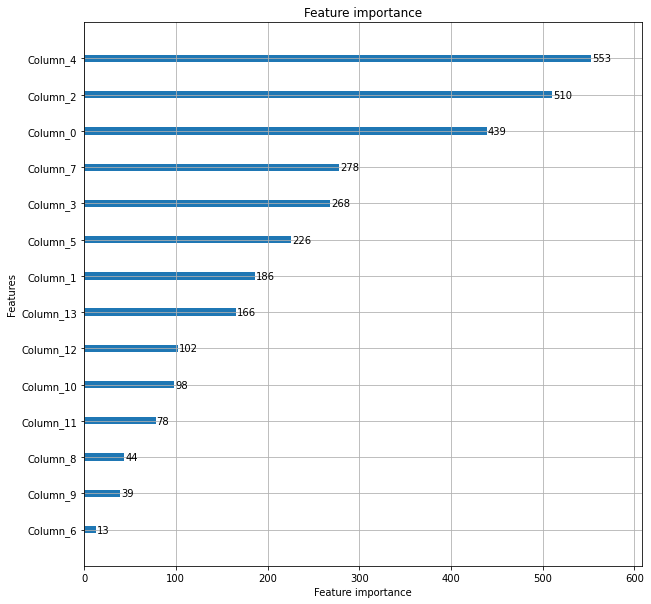

In [371]:
#Using plot_importance
lgb.plot_importance(modellgb, figsize =(10,10))

**From this result of the feature importance, the colums are ranked as follow:**

ExitRate

ProductRelated

AdministrativeDuration

BounceRate

PageValues

TrafficTypes

InformationDuration

Region

Browser

OperatingSystems

ReturningVisitor

Weekend

SpecialDay

**It is logical to expect ProductDuration to be an important feature as visitors to an eshop will likely spend time to look at the products they are interested in buying. However, it is surprising to have ExitRate as the most important, but from the statistical information for the columns it is evident that the average exit rate for visitors is very low at 0.04 seconds. This results appear to imply that visitors who remain the longest on the eshop are the ones who are likely to convert.**

**A drawback for this business challenge is the fact that the data set does not have specific products that visitors have purchased as this would allow for depper analysis of the eshop's performance.**